In [27]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt


from tensorflow.python.framework import dtypes
from tensorflow.contrib import learn

from keras.models import Sequential  
from keras.layers.core import Dense, Activation  
from keras.layers.recurrent import LSTM
from keras.layers import Dropout

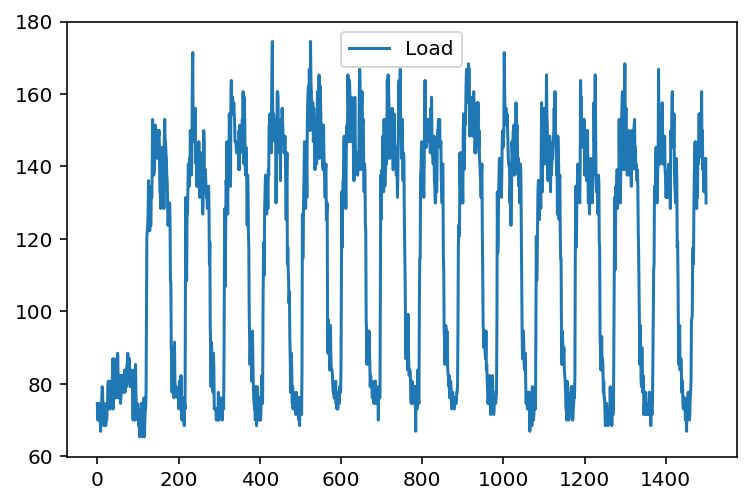

In [28]:
df = pd.read_csv("data/elec_load.csv", error_bad_lines=False)
plt.subplot()
plot_test, = plt.plot(df.values[:1500], label='Load')
plt.legend(handles=[plot_test])

                Load
count  140256.000000
mean      145.332503
std        48.477976
min         0.000000
25%       106.850998
50%       151.428571
75%       177.557604
max       338.218126


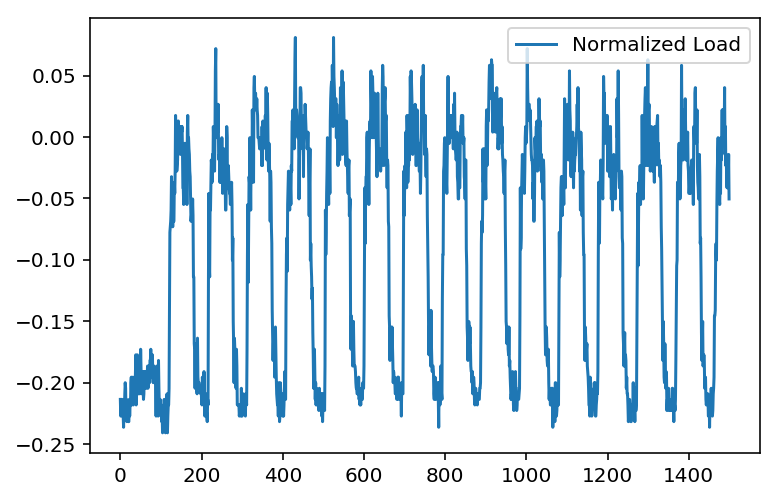

In [29]:
print(df.describe())
array=(df.values- 147.0) /339.0
plt.subplot()
plot_test, = plt.plot(array[:1500], label='Normalized Load')
plt.legend(handles=[plot_test])

In [30]:
listX = []
listy = []
X={}
y={}

for i in range(0,len(array)-6):
    listX.append(array[i:i+5].reshape([5,1]))
    listy.append(array[i+6])

arrayX=np.array(listX)
arrayy=np.array(listy)


X['train']=arrayX[0:13000]
X['test']=arrayX[13000:14000]

y['train']=arrayy[0:13000]
y['test']=arrayy[13000:14000]


In [31]:
#Build the model

model = Sequential()

#model.add(LSTM( input_dim=1, output_dim=50, return_sequences=True))
model.add(LSTM(return_sequences=True, units=50, input_shape=(None, 1)))

model.add(Dropout(0.2))

#model.add(LSTM( input_dim=100, output_dim=200, return_sequences=False))
model.add(LSTM(return_sequences=False, units=200, input_shape=(None, 100)))
model.add(Dropout(0.2))

#model.add(Dense(output_dim=1))
model.add(Dense(units=1))
model.add(Activation("linear"))


model.compile(loss="mse", optimizer="rmsprop")
    

#Fit the model to the data

model.fit(X['train'], y['train'], batch_size=512, epochs=10, validation_split=0.08)
test_results = model.predict( X['test'])

# Rescale the test dataset and predicted data

test_results = test_results* 339 + 147
y['test'] = y['test'] * 339 + 147

Train on 11960 samples, validate on 1040 samples
Epoch 1/10
11960/11960 [==============================] - 1s - loss: 0.0032 - val_loss: 0.0021
Epoch 2/10
11960/11960 [==============================] - 0s - loss: 0.0020 - val_loss: 0.0017
Epoch 3/10
11960/11960 [==============================] - 0s - loss: 0.0018 - val_loss: 0.0017
Epoch 4/10
11960/11960 [==============================] - 0s - loss: 0.0017 - val_loss: 0.0017
Epoch 5/10
11960/11960 [==============================] - 0s - loss: 0.0016 - val_loss: 0.0015
Epoch 6/10
11960/11960 [==============================] - 0s - loss: 0.0014 - val_loss: 0.0018
Epoch 7/10
11960/11960 [==============================] - 0s - loss: 0.0014 - val_loss: 0.0013
Epoch 8/10
11960/11960 [==============================] - 0s - loss: 0.0013 - val_loss: 0.0014
Epoch 9/10
11960/11960 [==============================] - 0s - loss: 0.0013 - val_loss: 0.0013
Epoch 10/10
11960/11960 [==============================] - 0s - loss: 0.0012 - val_loss: 0.0011


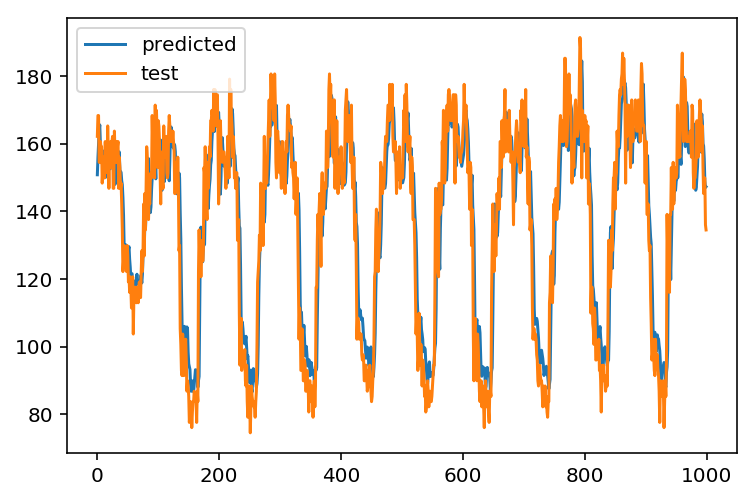

In [32]:
plt.subplot()
plot_predicted, = plt.plot(test_results, label='predicted')

plot_test, = plt.plot(y['test']  , label='test')
plt.legend(handles=[plot_predicted, plot_test])